In [38]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [57]:
IMAGE_SIZE = (256,256)
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [40]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Potato_dataset",
    shuffle=True,
    image_size=(IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [41]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [42]:
len(dataset)

68

In [43]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0])
    print(label_batch.numpy())

tf.Tensor(
[[[184. 178. 188.]
  [154. 148. 158.]
  [180. 174. 184.]
  ...
  [141. 135. 139.]
  [160. 154. 158.]
  [136. 130. 134.]]

 [[170. 164. 174.]
  [139. 133. 143.]
  [133. 127. 137.]
  ...
  [155. 149. 153.]
  [161. 155. 159.]
  [147. 141. 145.]]

 [[209. 203. 213.]
  [147. 141. 151.]
  [147. 141. 151.]
  ...
  [165. 159. 163.]
  [151. 145. 149.]
  [150. 144. 148.]]

 ...

 [[185. 184. 192.]
  [169. 168. 176.]
  [167. 166. 174.]
  ...
  [204. 202. 207.]
  [204. 202. 207.]
  [198. 196. 201.]]

 [[170. 169. 177.]
  [164. 163. 171.]
  [165. 164. 172.]
  ...
  [200. 198. 203.]
  [198. 196. 201.]
  [194. 192. 197.]]

 [[170. 169. 177.]
  [176. 175. 183.]
  [177. 176. 184.]
  ...
  [205. 203. 208.]
  [203. 201. 206.]
  [202. 200. 205.]]], shape=(256, 256, 3), dtype=float32)
[0 0 1 0 0 1 1 1 1 1 0 2 0 1 1 1 1 0 1 0 1 1 1 1 0 2 2 1 0 0 1 0]


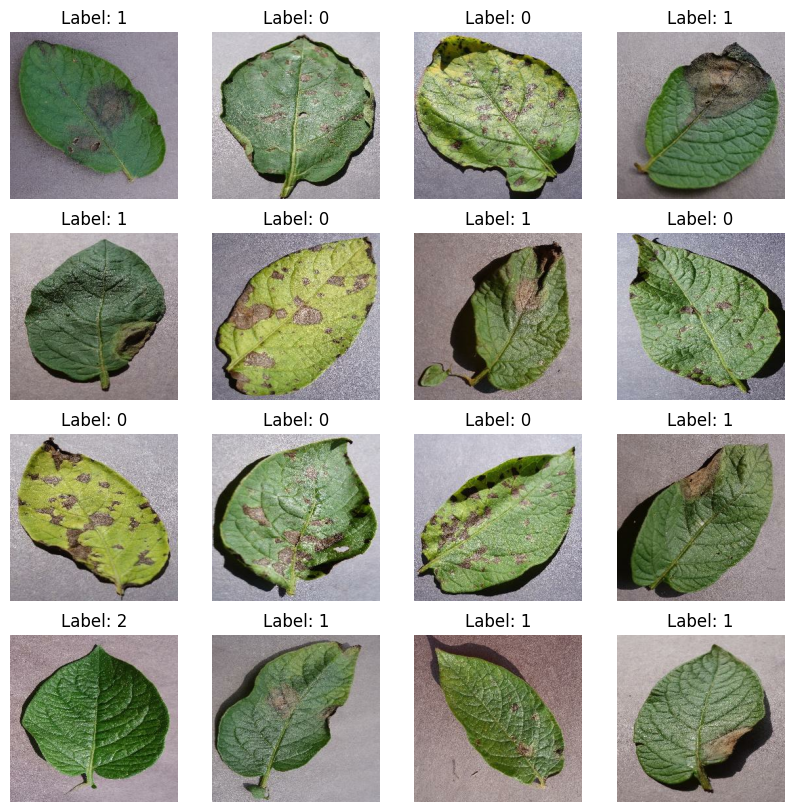

In [44]:

for image_batch, label_batch in dataset.take(1):
    plt.figure(figsize=(10, 10))
    num_images = min(len(image_batch), 16)  # Display at most 16 images
    for i in range(num_images):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(f"Label: {label_batch[i]}")
        plt.axis("off")
    plt.show()


In [45]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [46]:
train_ds = dataset.take(54)
len(train_ds)

54

In [47]:
test_ds = dataset.skip(54)
print(len(test_ds))

14


In [48]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [49]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [50]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [51]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
      
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size ).skip(val_size)
    
    return train_ds, val_ds, test_ds


In [52]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)
len(train_ds)
len(val_ds)

6

In [53]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [54]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 256)
])


In [55]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

# Example usage
input_image = tf.random.normal([1, 300, 300, 3])
output_image = data_augmentation(input_image)
print(output_image.shape)

(1, 300, 300, 3)


In [64]:
# Constants
IMAGE_SIZE = 256
CHANNELS = 3

# Define the input layer
inputs = layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS), dtype=tf.float32)  # Specify the data type

# Build the model
n_classes = 3

model = tf.keras.Sequential([
    inputs,  # Add the input layer
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

# Summarize the model
model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [68]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 29s 529ms/step - accuracy: 1.0000 - loss: 2.6413e-05 - val_accuracy: 0.9948 - val_loss: 0.0178
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 27s 507ms/step - accuracy: 1.0000 - loss: 2.4823e-05 - val_accuracy: 0.9948 - val_loss: 0.0164
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 29s 534ms/step - accuracy: 1.0000 - loss: 1.9862e-05 - val_accuracy: 0.9948 - val_loss: 0.0192
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 30s 550ms/step - accuracy: 1.0000 - loss: 1.4386e-05 - val_accuracy: 0.9948 - val_loss: 0.0172
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 29s 534ms/step - accuracy: 1.0000 - loss: 1.5140e-05 - val_accuracy: 0.9948 - val_loss: 0.0170
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 30s 550ms/step - accuracy: 1.0000 - loss: 1.3253e-05 - val_accuracy: 0.9948 - val_loss: 0.0197
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 28s 527ms/step - accuracy: 1.0000 - loss: 1.2402e-05 - val_accuracy: 0.9948 - val_loss: 0.0194
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 30s 547ms/step - accuracy: 1.00

In [ ]:
scores = model.evaluation(test_ds)

AttributeError: 'Sequential' object has no attribute 'evaluation'

In [ ]:
scores

In [ ]:
history

In [ ]:
history.params

In [ ]:
history.history.keys()

In [ ]:
acc = history.history['accuaracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training accuaracy')
plt.plot(range(EPOCHS), val_acc, label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('training and validation accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training loss')
plt.plot(range(EPOCHS), val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.title('training and validation loss')
plt.show()

In [ ]:
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("first image actual label:", class_first_label)
    
    batch_prediction = model.predict(images_batch)
    print("predicted label : "class_names[np.argmax(batch_prediction[0])])